In [2]:
from __future__ import  division
import numpy as np
import pandas as pd
import timeit


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pal = sns.color_palette()

In [4]:
x1 = pd.read_csv('train_features.csv')
x2 = pd.read_csv('magicfeat_train.csv')
x3 = pd.read_csv('fanokas.csv')
x4 = pd.read_csv('owl_feat.csv')
x5 = pd.read_csv('jacfeat.csv')
# x6 = pd.read_csv('russ_tr.gz')

print x1.head()
print x2.head()
print x3.head()
print x4.head()
print x5.head()
# print x6.head()

                                           question1  \
0  What is the step by step guide to invest in sh...   
1  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2  How can I increase the speed of my internet co...   
3  Why am I mentally very lonely? How can I solve...   
4  Which one dissolve in water quikly sugar, salt...   

                                           question2  len_q1  len_q2  \
0  What is the step by step guide to invest in sh...      66      57   
1  What would happen if the Indian government sto...      51      88   
2  How can Internet speed be increased by hacking...      73      59   
3  Find the remainder when [math]23^{24}[/math] i...      50      65   
4            Which fish would survive in salt water?      76      39   

   diff_len  len_char_q1  len_char_q2  len_word_q1  len_word_q2  common_words  \
0         9           20           20           14           12            10   
1       -37           21           29            8           13     

In [5]:
col_to_drop = ['z_len1','z_len2','z_word_len1','z_word_len2','z_word_match']

x4.drop(col_to_drop, inplace = True, axis = 1)

xf = pd.concat([x1,x2.ix[:,2:],x3.ix[:,1:],x4.ix[:,9:],x5.ix[:,1:]], axis = 1)

xf.head()

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


,question1,question2,len_q1,len_q2,diff_len,len_char_q1,len_char_q2,len_word_q1,len_word_q2,common_words,...,who_both,q1_where,q2_where,where_both,q1_when,q2_when,when_both,q1_why,q2_why,why_both
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,66,57,9,20,20,14,12,10,...,0,0,0,0,0,0,0,0,0,0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,51,88,-37,21,29,8,13,4,...,0,0,0,0,0,0,0,0,0,0
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,73,59,14,25,24,14,10,4,...,0,0,0,0,0,0,0,0,0,0
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,50,65,-15,19,26,11,9,0,...,0,0,0,0,0,1,0,1,0,0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,76,39,37,25,18,13,7,2,...,0,0,0,0,0,0,0,0,0,0


In [6]:
x1t = pd.read_csv('test_features.csv')
x2t = pd.read_csv('magicfeat_test.csv')
x3t = pd.read_csv('fanokas_test.csv')
x4t = pd.read_csv('owl_feat_test.csv')
x5t = pd.read_csv('jacfeat_test.csv')
# x6t = pd.read_csv('russ_test.csv')


print x1t.head()
print x2t.head()
print x3t.head()
print x4t.head()
print x5t.head()


                                           question1  \
0  How does the Surface Pro himself 4 compare wit...   
1  Should I have a hair transplant at age 24? How...   
2  What but is the best way to send money from Ch...   
3                        Which food not emulsifiers?   
4                   How "aberystwyth" start reading?   

                                           question2  len_q1  len_q2  \
0  Why did Microsoft choose core m3 and not core ...      57      68   
1        How much cost does hair transplant require?      66      43   
2                      What you send money to China?      60      29   
3                                  What foods fibre?      27      17   
4                     How their can I start reading?      32      30   

   diff_len  len_char_q1  len_char_q2  len_word_q1  len_word_q2  common_words  \
0       -11           21           22           11           14             2   
1        23           24           19           14            7     

In [7]:
col_to_drop = ['z_len1','z_len2','z_word_len1','z_word_len2','z_word_match']

x4t.drop(col_to_drop, inplace = True, axis = 1)

xft = pd.concat([x1t,x2t.ix[:,2:],x3t.ix[:,1:],x4t.ix[:,6:],x5t.ix[:,1:]], axis = 1)

xft.head()

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


,question1,question2,len_q1,len_q2,diff_len,len_char_q1,len_char_q2,len_word_q1,len_word_q2,common_words,...,who_both,q1_where,q2_where,where_both,q1_when,q2_when,when_both,q1_why,q2_why,why_both
0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...,57,68,-11,21,22,11,14,2,...,0,0,0,0,0,0,0,0,1,0
1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?,66,43,23,24,19,14,7,4,...,0,0,0,0,0,0,0,0,0,0
2,What but is the best way to send money from Ch...,What you send money to China?,60,29,31,21,15,14,6,4,...,0,0,0,0,0,0,0,0,0,0
3,Which food not emulsifiers?,What foods fibre?,27,17,10,16,13,4,3,0,...,0,0,0,0,0,0,0,0,0,0
4,"How ""aberystwyth"" start reading?",How their can I start reading?,32,30,2,17,16,4,6,3,...,0,0,0,0,0,0,0,0,0,0


In [44]:
X = xf.ix[:,2:]

# class weight = {0: 1.309028344, 1: 0.472001959}

# X['weight'] =np.where(X.is_duplicate == 1.0 , 0.472001959 ,1.309028344)
# X['qmax'] = df_train['qmax']

y = X['is_duplicate'].values

X.drop('is_duplicate', inplace = True, axis = 1)

# df.T.drop_duplicates().T

In [53]:
col_to_drop = ['q1_hash','q2_hash']

X.drop(col_to_drop, inplace = True, axis = 1)

# X.columns


In [10]:
sbtr = np.loadtxt("sbenchfeat_tsvd100_train.gz", delimiter=",")
rstr = np.loadtxt("russ_tr.gz", delimiter=",")
rspacetr = np.loadtxt("russpacy_tr.gz", delimiter=",")

sbts = np.loadtxt("sbenchfeat_tsvd100_test.gz", delimiter=",")
rsts = np.loadtxt("russ_ts.gz", delimiter=",")
rspacets = np.loadtxt("russpacy_ts.gz", delimiter=",")

print sbtr.shape
print rstr.shape
print rspacetr.shape

print sbts.shape
print rsts.shape
print rspacets.shape


(404290, 100)
(404290, 22)
(404290, 4)
(2345796, 100)
(2345796, 22)
(2345796, 4)


In [11]:
magic2tr = np.loadtxt("magic2_tr.gz", delimiter=",")
magic2ts = np.loadtxt("magic2_ts.gz", delimiter=",")

print magic2tr.shape
print magic2ts.shape


(404290,)
(2345796,)


In [80]:
magic3tr = np.loadtxt("magic3_tr.gz", delimiter=",")
magic3ts = np.loadtxt("magic3_ts.gz", delimiter=",")

print magic3tr.shape
print magic3ts.shape


(404290, 2)
(2345796, 2)


In [81]:
# psf = np.loadtxt("punsurface_train.csv", delimiter=",")

# sbtr4k = np.loadtxt("sbenchfeat_tsvd400_train.gz", delimiter=",")

# rstr = np.loadtxt("russ_tr.gz", delimiter=",")
# # sbtr.shape
x_train = np.column_stack((np.array(X),rstr[:,0:17],rstr[:,18:20],rspacetr[:,0:3],sbtr,magic2tr,magic3tr))

# x_train = np.column_stack((np.array(X),rstr[:,0:17],rstr[:,18:20],rspacetr[:,0:3],sbtr,np.array(train_qmin),
#                           np.array(train_diff)))

print x_train.shape

(404290, 213)


In [83]:
# xtest = xft.ix[:,2:]

# col_to_drop = ['q1_hash','q2_hash']
# xtest.drop(col_to_drop, inplace = True, axis = 1)

x_test = np.column_stack((np.array(xtest),rsts[:,0:17],rsts[:,18:20],rspacets[:,0:3],sbts,magic2ts,magic3ts))
#                           ,np.array(test_qmin)))

print x_test.shape

(2345796, 213)


In [ ]:
RS = 2016
ROUNDS = 400

print("Started")
np.random.seed(RS)
input_folder = ''

# x_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=RS)

import xgboost as xgb

# Set our parameters for xgboost
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.05
params['max_depth'] = 9
params['seed'] = RS
params['gamma'] = 0.5
params['subsample'] = 0.75
params['colsample_bytree'] = 0.75
params['min_child_weight'] = 10
params['reg_alpha'] = 2

from sklearn import model_selection
from sklearn.metrics import log_loss
from sklearn.model_selection import KFold

# x_train = np.array(X)
y_train = np.array(y)


train_stacker=[ [0.0 for s in range(1)]  for k in range (0,(x_train.shape[0])) ]

cv_scores = []
oof_preds = []
a = [0 for x in range(2345796)]
# StratifiedKFold
# kf = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=RS)
# for dev_index, val_index in kf.split(range(x_train.shape[0]),y_train):
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=2016)
for dev_index, val_index in kf.split(range(x_train.shape[0])):
        dev_X, val_X = x_train[dev_index,:], x_train[val_index,:]
        dev_y, val_y = y_train[dev_index], y_train[val_index]
        print dev_X.shape
        print val_X.shape
        
        pos_train = dev_X[dev_y == 1]
        neg_train = dev_X[dev_y == 0]

        print("Oversampling started for proportion: {}".format(len(pos_train) / (len(pos_train) + len(neg_train))))
        p = 0.165
        scale = ((len(pos_train) / (len(pos_train) + len(neg_train))) / p) - 1
        while scale > 1:
            neg_train = np.concatenate((neg_train, neg_train))
            scale -=1
        neg_train = np.concatenate((neg_train, neg_train[:int(scale * len(neg_train))]))
        print("Oversampling done, new proportion: {}".format(len(pos_train) / (len(pos_train) + len(neg_train))))

        dev_X = np.concatenate((pos_train, neg_train))
        dev_y = (np.zeros(len(pos_train)) + 1).tolist() + np.zeros(len(neg_train)).tolist()
        del pos_train, neg_train  

        pos_train = val_X[val_y == 1]
        neg_train = val_X[val_y == 0]

        print("Oversampling started for proportion: {}".format(len(pos_train) / (len(pos_train) + len(neg_train))))
        p = 0.165
        scale = ((len(pos_train) / (len(pos_train) + len(neg_train))) / p) - 1
        while scale > 1:
            neg_train = np.concatenate((neg_train, neg_train))
            scale -=1
        neg_train = np.concatenate((neg_train, neg_train[:int(scale * len(neg_train))]))
        print("Oversampling done, new proportion: {}".format(len(pos_train) / (len(pos_train) + len(neg_train))))

        val_X = np.concatenate((pos_train, neg_train))
        val_y = (np.zeros(len(pos_train)) + 1).tolist() + np.zeros(len(neg_train)).tolist()
        del pos_train, neg_train  

        print dev_X.shape
        print val_X.shape

        d_train = xgb.DMatrix(dev_X, label=dev_y)
        d_valid = xgb.DMatrix(val_X, label=val_y)

        watchlist = [(d_train, 'train'), (d_valid, 'valid')]

        bst = xgb.train(params, d_train, 15000, watchlist, early_stopping_rounds=50, verbose_eval=100)

        preds = bst.predict(d_valid)

        cv_scores.append(log_loss(val_y, preds))
        
        d_test = xgb.DMatrix(x_test)
        preds_tr = bst.predict(d_test)

        a = np.column_stack((a,preds_tr))
#         cv_scores.append(log_loss(val_y, preds*0.99))
#         cv_scores.append(log_loss(val_y, preds*0.98))
#         cv_scores.append(log_loss(val_y, preds*0.95))
#         cv_scores.append(log_loss(val_y, preds*0.90))

        print(cv_scores)
#         break

        no=0
        for real_index in val_index:
#             for d in range (0,1):
            train_stacker[real_index]= preds
            no+=1
# [0.16748127157337658, 0.16684166705689202, 0.16774259598228028, 0.16860173199158554, 0.16744881732477593]

# [0.17075681624447991, 0.17050221390652423, 0.17200605767537988, 0.17245736707003725, 0.17188101163785244]

# [0.16929542655837962, 0.16913395911797599, 0.17020455043037769, 0.17078689906272446, 0.17036959655961528]

Started
(323432, 213)
(80858, 213)
Oversampling started for proportion: 0.369026565089
Oversampling done, new proportion: 0.191259632688
Oversampling started for proportion: 0.369883004774
Oversampling done, new proportion: 0.191181170815
(624047, 213)
(156438, 213)
[0]	train-logloss:0.658105	valid-logloss:0.658258
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 50 rounds.
[100]	train-logloss:0.17265	valid-logloss:0.184871
[200]	train-logloss:0.146595	valid-logloss:0.174342
[300]	train-logloss:0.12944	valid-logloss:0.171065
[400]	train-logloss:0.116822	valid-logloss:0.16944
[500]	train-logloss:0.106111	valid-logloss:0.168323
[600]	train-logloss:0.096494	valid-logloss:0.16788
[700]	train-logloss:0.088224	valid-logloss:0.167506
[800]	train-logloss:0.080542	valid-logloss:0.16748
Stopping. Best iteration:
[767]	train-logloss:0.083028	valid-logloss:0.167436

[0.16748127157337658]
(323432, 213)
(80858

In [85]:
b = pd.DataFrame(a)

b['sum'] = b.sum(axis = 1)/5

b.head()

,0,1,2,3,4,5,sum
0,0.0,0.000808,0.000489,0.000227,0.000559,0.000284,0.000473
1,0.0,0.140276,0.172132,0.141123,0.198023,0.176940,0.165699
2,0.0,0.253414,0.286618,0.396763,0.236704,0.221590,0.279018
3,0.0,0.000046,0.000216,0.000098,0.000111,0.000055,0.000105
4,0.0,0.010484,0.015328,0.009719,0.007972,0.009495,0.010599


In [86]:
sub = pd.DataFrame()
sub['test_id'] = x4t['test_id']
sub['is_duplicate'] = b['sum']
sub.to_csv("xgb2016_5f_0.167x.csv", index=False)


In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from collections import defaultdict

train_orig =  pd.read_csv('train.csv', header=0)
test_orig =  pd.read_csv('test.csv', header=0)
# "id","qid1","qid2","question1","question2","is_duplicate"
df_id1 = train_orig[["qid1", "question1"]].drop_duplicates(keep="first").copy().reset_index(drop=True)
df_id2 = train_orig[["qid2", "question2"]].drop_duplicates(keep="first").copy().reset_index(drop=True)

df_id1.columns = ["qid", "question"]
df_id2.columns = ["qid", "question"]

print(df_id1.shape, df_id2.shape)

df_id = pd.concat([df_id1, df_id2]).drop_duplicates(keep="first").reset_index(drop=True)
print(df_id1.shape, df_id2.shape, df_id.shape)

import csv
dict_questions = df_id.set_index('question').to_dict()
dict_questions = dict_questions["qid"]

new_id = 538000 # df_id["qid"].max() ==> 537933

def get_id(question):
    global dict_questions 
    global new_id 
    
    if question in dict_questions:
        return dict_questions[question]
    else:
        new_id += 1
        dict_questions[question] = new_id
        return new_id
    
rows = []
max_lines = 10
if True:
    with open('test.csv', 'r') as infile:
        reader = csv.reader(infile, delimiter=",")
        header = next(reader)
        header.append('qid1')
        header.append('qid2')
        
        if True:
            print(header)
            pos, max_lines = 0, 10*1000*1000
            for row in reader:
                # "test_id","question1","question2"
                question1 = row[1]
                question2 = row[2]

                qid1 = get_id(question1)
                qid2 = get_id(question2)
                row.append(qid1)
                row.append(qid2)

                pos += 1
                if pos >= max_lines:
                    break
                rows.append(row)

((290654, 2), (299364, 2))
((290654, 2), (299364, 2), (537933, 2))
['test_id', 'question1', 'question2', 'qid1', 'qid2']


In [16]:
# train_df.columns

tst = pd.DataFrame(rows)

tst.columns = ['test_id', 'question1', 'question2','qid1_n','qid2_n']

q1_max = train_orig.qid1.max()
q2_max = train_orig.qid2.max()

ratio = 8

tst['qid1'] = (tst['qid1_n'] - q1_max)/ratio + q1_max
tst['qid2'] = (tst['qid2_n'] - q2_max)/ratio + q2_max

# question_id = ( question_id - max_question_id ) / ratio + max_question_id

In [17]:
tst.head()

,test_id,question1,question2,qid1_n,qid2_n,qid1,qid2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...,538001,538002,537940.625,537941.625
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?,538003,538004,537940.875,537941.875
2,2,What but is the best way to send money from Ch...,What you send money to China?,538005,538006,537941.125,537942.125
3,3,Which food not emulsifiers?,What foods fibre?,538007,538008,537941.375,537942.375
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?,538009,538010,537941.625,537942.625


In [21]:
col_to_keep = ['qid1','qid2']

all_df = pd.concat([train_orig[col_to_keep],tst[col_to_keep]])

all_df['qmin'] = all_df.apply( lambda row: min(row["qid1"], row["qid2"]), axis=1 )

all_df.head()

,qid1,qid2,qmin
0,1.0,2.0,1.0
1,3.0,4.0,3.0
2,5.0,6.0,5.0
3,7.0,8.0,7.0
4,9.0,10.0,9.0


In [26]:
train_qmin = all_df.iloc[:404290,:]['qmin']
test_qmin = all_df.iloc[404290:,:]['qmin']
# test_qmin
# (2345796,)]

0           537940.625
1           537940.875
2           537941.125
3           537941.375
4           537941.625
5           537941.875
6           480004.625
7           537942.250
8           537942.500
9           537942.750
10          510459.875
11          537943.125
12          537943.375
13          537943.625
14          537943.875
15          474411.000
16          537944.250
17          537944.500
18          537944.750
19          537945.000
20          537945.250
21          537945.500
22          527565.500
23          537945.875
24          537946.125
25          537946.375
26          537946.625
27          537946.875
28          537947.125
29          537947.375
              ...     
2345766    1069392.625
2345767    1069392.875
2345768     698184.750
2345769    1069393.250
2345770    1069393.500
2345771     491193.625
2345772    1069393.750
2345773     540406.500
2345774    1069394.125
2345775    1069394.375
2345776    1069394.625
2345777    1069394.875
2345778    

In [117]:

# tst.head()

mapping     = { }

# df_train = pd.read_csv( settings["data_path"] + "/train.csv")
train_df["qmin"] = train_df.apply( lambda row: min( 
    mapping.setdefault(row["qid1"], len(mapping)), mapping.setdefault(row["qid2"], len(mapping))), axis=1 )

# df_test  = pd.read_csv( settings["data_path"] + "/test.csv")
tst["qmin"] = tst.apply( lambda row: min( 
    mapping.setdefault(row["qid1_n"], len(mapping)), mapping.setdefault(row["qid2_n"], len(mapping))), axis=1 )


In [119]:
train_qmin = train_df["qmin"]

test_qmin = tst["qmin"]

In [53]:
# [915]	train-logloss:0.165425	valid-logloss:0.226348  - 6 
# [579]	train-logloss:0.161314	valid-logloss:0.226369  - 7 
# [926]	train-logloss:0.164284	valid-logloss:0.225922  - 6 g 0.5
# [543]	train-logloss:0.156218	valid-logloss:0.196604 
# [746]	train-logloss:0.153537	valid-logloss:0.219813
# [810]	train-logloss:0.133107	valid-logloss:0.215079
# [1009]	train-logloss:0.12129	valid-logloss:0.20723
# [1052]	train-logloss:0.128677	valid-logloss:0.215673

pos_train = x_train[y_train == 1]
neg_train = x_train[y_train == 0]

print("Oversampling started for proportion: {}".format(len(pos_train) / (len(pos_train) + len(neg_train))))
p = 0.165
scale = ((len(pos_train) / (len(pos_train) + len(neg_train))) / p) - 1
while scale > 1:
    neg_train = np.concatenate((neg_train, neg_train))
    scale -=1
neg_train = np.concatenate((neg_train, neg_train[:int(scale * len(neg_train))]))
print("Oversampling done, new proportion: {}".format(len(pos_train) / (len(pos_train) + len(neg_train))))

dev_X = np.concatenate((pos_train, neg_train))
dev_y = (np.zeros(len(pos_train)) + 1).tolist() + np.zeros(len(neg_train)).tolist()
del pos_train, neg_train  

print dev_X.shape

d_train = xgb.DMatrix(dev_X, label=dev_y)

watchlist = [(d_train, 'train')]

bst = xgb.train(params, d_train, 1013, watchlist, early_stopping_rounds=50, verbose_eval=100)

xtest = xft.ix[:,2:]

col_to_drop = ['q1_hash','q2_hash']

xtest.drop(col_to_drop, inplace = True, axis = 1)

x_test = np.column_stack((np.array(xtest),rsts[:,0:17],rsts[:,18:20],rspacets[:,0:3],sbts))
# x_train = np.column_stack((np.array(X),rstr[:,0:17],rstr[:,18:20],rspacetr[:,0:3],sbtr))

# x_test = np.array(xtest)

print x_test.shape

d_test = xgb.DMatrix(x_test)
preds = bst.predict(d_test)


sub = pd.DataFrame()
sub['test_id'] = x4t['test_id']
sub['is_duplicate'] = preds
sub.to_csv("xgb2016_1013f_0.213.csv", index=False)

sub = pd.DataFrame()
sub['test_id'] = x4t['test_id']
sub['is_duplicate'] = preds*0.99
sub.to_csv("xgb2016_1013f_0.213_0.99.csv", index=False)

sub = pd.DataFrame()
sub['test_id'] = x4t['test_id']
sub['is_duplicate'] = preds*0.98
sub.to_csv("xgb2016_1013f_0.213_0.98.csv", index=False)

sub = pd.DataFrame()
sub['test_id'] = x4t['test_id']
sub['is_duplicate'] = preds*0.95
sub.to_csv("xgb2016_1013f_0.213_0.98.csv", index=False)


Oversampling started for proportion: 0.369197853026
Oversampling done, new proportion: 0.191243661001
(780486, 210)
[0]	train-logloss:0.66311
Will train until train-logloss hasn't improved in 50 rounds.
[100]	train-logloss:0.221735
[200]	train-logloss:0.19404
[300]	train-logloss:0.175682
[400]	train-logloss:0.16179
[500]	train-logloss:0.149322
[600]	train-logloss:0.13853
[700]	train-logloss:0.128768
[800]	train-logloss:0.119688
[900]	train-logloss:0.110913
[1000]	train-logloss:0.103234
[1012]	train-logloss:0.102363
(2345796, 210)


In [55]:
sub = pd.DataFrame()
sub['test_id'] = x4t['test_id']
sub['is_duplicate'] = preds*0.90
sub.to_csv("xgb2016_1013f_0.213_0.90.csv", index=False)


In [28]:
a = pd.read_csv('xgb2016_950f_0.207_0.80.csv')

a.head()

,test_id,is_duplicate
0,0,0.000407
1,1,0.334397
2,2,0.205886
3,3,0.000034
4,4,0.051428


In [ ]:
xtest = xft.ix[:,2:]

col_to_drop = ['q1_hash','q2_hash']
xtest.drop(col_to_drop, inplace = True, axis = 1)

sbts = np.loadtxt("sbenchfeat_tsvd400_test.gz", delimiter=",")
rsts = np.loadtxt("russ_ts.gz", delimiter=",")
x_test = np.column_stack((np.array(xtest),rsts,sbts))

# x_test = np.array(xtest)

print x_test.shape

d_test = xgb.DMatrix(x_test)
preds = bst.predict(d_test)

sub = pd.DataFrame()
sub['test_id'] = x4t['test_id']
sub['is_duplicate'] = preds*0.98
sub.to_csv("xgb2016_800f_0.212.csv", index=False)


(2345796, 308)


In [77]:
# import pandas as pd
# import networkx as nx

# train_df = pd.read_csv('train.csv')
# test_df = pd.read_csv('test.csv')

# df = pd.concat([train_df, test_df])


# g = nx.Graph()
# g.add_nodes_from(df.question1)
# g.add_nodes_from(df.question2)
# edges = list(df[['question1', 'question2']].to_records(index=False))
# g.add_edges_from(edges)


# def get_intersection_count(row):
#     return(len(set(g.neighbors(row.question1)).intersection(set(g.neighbors(row.question2)))))


train_df['intersection_count'] = train_df.apply(lambda row: get_intersection_count(row), axis=1)
test_df['intersection_count'] = test_df.apply(lambda row: get_intersection_count(row), axis=1)

In [79]:
train_df

,id,qid1,qid2,question1,question2,is_duplicate,intersection_count
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1,0
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1,0
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0,1
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0,0


/usr/lib64/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


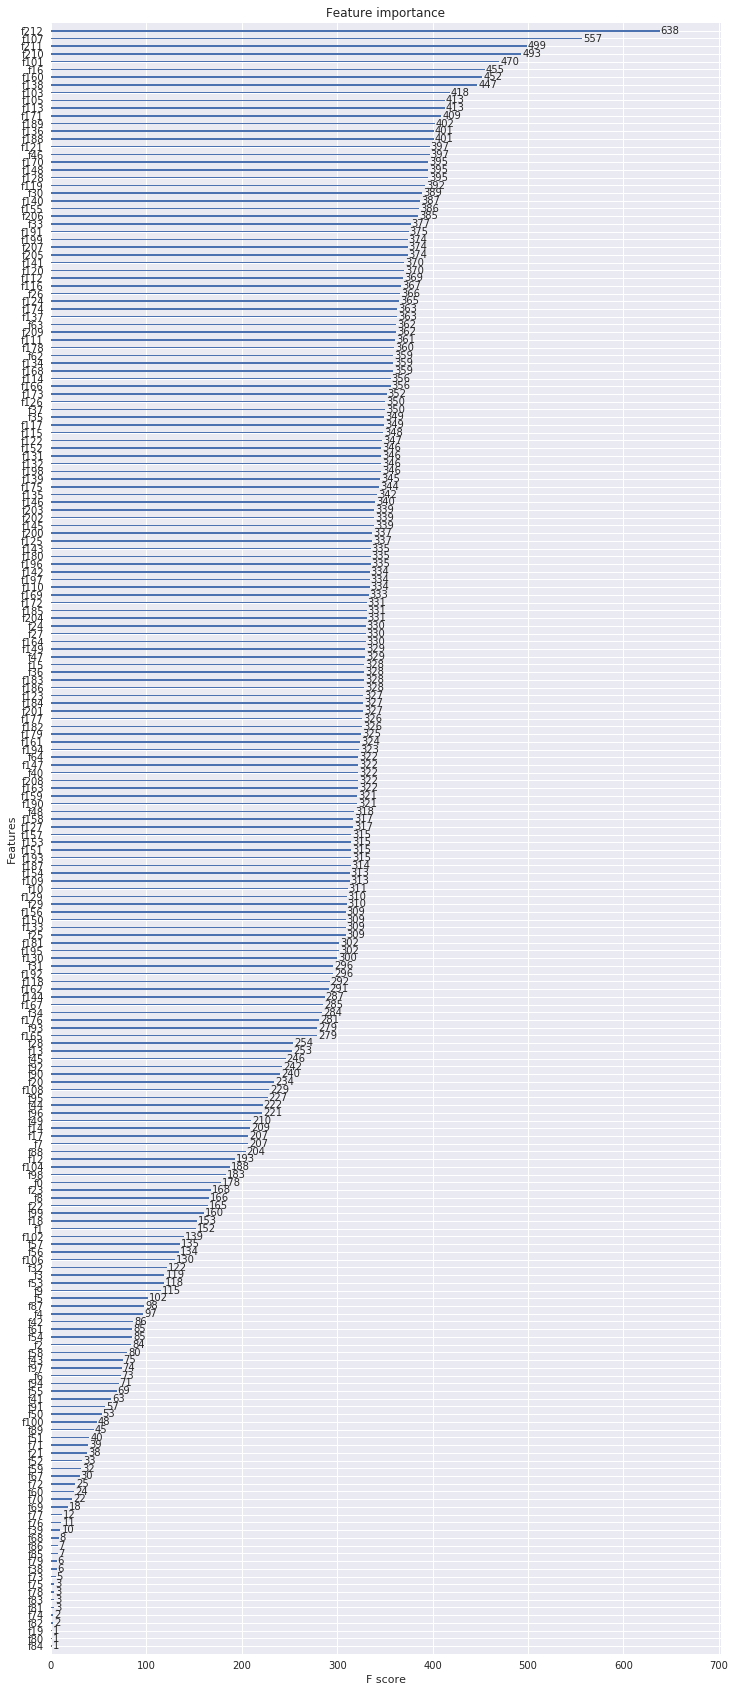

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (12.0, 30.0)
xgb.plot_importance(bst); plt.show()

In [32]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from collections import defaultdict
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

train_orig =  pd.read_csv('train.csv', header=0)
test_orig =  pd.read_csv('test.csv', header=0)

ques = pd.concat([train_orig[['question1', 'question2']], \
        test_orig[['question1', 'question2']]], axis=0).reset_index(drop='index')
ques.shape

q_dict = defaultdict(set)
for i in range(ques.shape[0]):
        q_dict[ques.question1[i]].add(ques.question2[i])
        q_dict[ques.question2[i]].add(ques.question1[i])

/usr/lib64/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


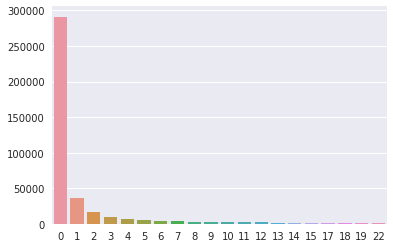

In [58]:
def q1_q2_intersect(row):
    return(len(set(q_dict[row['question1']]).symmetric_difference(set(q_dict[row['question2']]))))

train_orig['q1_q2_intersect'] = train_orig.apply(q1_q2_intersect, axis=1, raw=True)
test_orig['q1_q2_intersect'] = test_orig.apply(q1_q2_intersect, axis=1, raw=True)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

temp = train_orig.q1_q2_intersect.value_counts()
sns.barplot(temp.index[:20], temp.values[:20])

In [59]:
train_feat = train_orig[['q1_q2_intersect']]
test_feat = test_orig[['q1_q2_intersect']]

In [33]:
def q1_q2_diff(row):
    return(len(set(q_dict[row['question1']]).symmetric_difference(set(q_dict[row['question2']]))))

train_orig['q1_q2_diff'] = train_orig.apply(q1_q2_diff, axis=1, raw=True)
test_orig['q1_q2_diff'] = test_orig.apply(q1_q2_diff, axis=1, raw=True)


In [34]:
train_diff = train_orig[['q1_q2_diff']]
test_diff = test_orig[['q1_q2_diff']]

In [56]:
np.savetxt('x_train.gz', x_train, delimiter=",", fmt='%.5f')
np.savetxt('x_test.gz', x_test, delimiter=",", fmt='%.5f')


In [35]:
# np.savetxt('magic2_tr.gz', np.array(train_feat), delimiter=",", fmt='%.5f')
# np.savetxt('magic2_ts.gz', np.array(test_feat), delimiter=",", fmt='%.5f')

np.savetxt('magic2_difftr.gz', np.array(train_diff), delimiter=",", fmt='%.5f')
np.savetxt('magic2_diffts.gz', np.array(test_diff), delimiter=",", fmt='%.5f')


In [40]:
import lightgbm as lgbm
# 'metric': 'binary_logloss', 'num_boost_round' :1000,
t4_params = {
    'boosting_type': 'gbdt', 'objective': 'binary', 'nthread': -1, 'silent': True,
    'num_leaves': 2**5, 'learning_rate': 0.1, 'max_depth': 6,
    'max_bin': 255, 'subsample_for_bin': 50000,
    'subsample': 0.75, 'subsample_freq': 1, 'colsample_bytree': 0.65, 'reg_alpha':2, 'reg_lambda':0,
    'min_split_gain': 0.5, 'min_child_weight': 10, 'min_child_samples': 2, 'scale_pos_weight': 1}

# they can be used directly to build a LGBMClassifier (which is wrapped in a sklearn fashion)
# t4 = lgbm.sklearn.LGBMClassifier(n_estimators=5000, seed=0, **t4_params)

In [42]:
# import lightgbm as lgbm
from sklearn import model_selection
from sklearn.metrics import log_loss
from sklearn.model_selection import KFold,StratifiedKFold

# train_stacker=[ [0.0 for s in range(3)]  for k in range (0,(x_train.shape[0])) ]
# test_stacker=[[0.0 for s in range(3)]   for k in range (0,(x_test.shape[0]))]

x_train = np.array(X[X.columns[~X.columns.str.contains('weight')]])
w = np.array(X['weight'])

cv_scores = []
oof_preds = []

# StratifiedKFold
kf = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=2016)
for dev_index, val_index in kf.split(range(x_train.shape[0]),y):
# kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=2016)
# for dev_index, val_index in kf.split(range(x_train.shape[0])):
        dev_X, val_X = x_train[dev_index,:], x_train[val_index,:]
        dev_y, val_y = y[dev_index], y[val_index]
        wtrain, wvalid = w[dev_index], w[val_index]

#         lgbm_params = t4_params.copy()

#         xgtrain = lgbm.Dataset(dev_X, dev_y, silent=True, weight = wtrain)

#         xgtest = lgbm.Dataset(val_X, val_y, silent=True, weight = wvalid)

#         valid_sets = [xgtrain, xgtest]
#         valid_names = ['train','test']

#         model = lgbm.train(lgbm_params,xgtrain, valid_sets=valid_sets, valid_names=valid_names,
#                            evals_result = {'valid_sets' :[xgtrain,xgtest],'valid_names':['eval', 'train'],'metric' :'binary_logloss'},
#                            early_stopping_rounds=50, verbose_eval = 100,)
        
#         preds = model.predict(xgtest)

        t4 = lgbm.sklearn.LGBMClassifier(n_estimators=5000, seed=0, **t4_params)
        model = t4.fit(dev_X, dev_y, sample_weight = wtrain , 
                       eval_set = [(val_X,val_y)], eval_metric = 'logloss',early_stopping_rounds = 50, verbose =100) 

        preds = model.predict_proba(val_X)
        cv_scores.append(log_loss(val_y, preds))

        # Rescale weights so that their sum is the same as for the entire training set
#         wtrain *= (sum(w) / sum(wtrain))
#         wvalid  *= (sum(w) / sum(wvalid))

#         sum_wpos = sum(wtrain[dev_y == 1])
#         sum_wneg = sum(wtrain[dev_y == 0])

        # construct xgboost.DMatrix from numpy array, treat -999.0 as missing value
#         xgmat = xgb.DMatrix(X_train, label=y_train, missing=-999.0, weight=w_train)

        # scale weight of positive examples
#         print(sum_wneg / sum_wpos)
#         print(sum_wpos / sum_wneg)
#         params['scale_pos_weight'] = sum_wpos / sum_wneg
        # you can directly throw param in, though we want to watch multiple metrics here 
#         plst = param.items()#+[('eval_metric', 'ams@0.15')]


#         p_test = bst.predict(d_valid)

#         a = 0.4719934994582882
#         b = 1.3090361445783132

#         preds = a * p_test / (a * p_test + b * (1 - p_test))

#         cv_scores.append(log_loss(val_y, preds))
#         oof_preds.append(preds)
#         predictions = bst.predict(X1cv)     
#         predictions = preds.reshape( val_X.shape[0], 3)
        print(cv_scores)
#         no=0
#         for real_index in val_index:
#             for d in range (0,3):
#                 train_stacker[real_index][d]=(predictions[no][d])
#             no+=1

# [0.33876330067492622, 0.33499202082286755, 0.33509751915814967, 0.33530161167260025, 0.33567794961699643]

Train until valid scores didn't improve in 50 rounds.
[100]	valid_0's binary_logloss: 0.367386
[200]	valid_0's binary_logloss: 0.352355
[300]	valid_0's binary_logloss: 0.34525
[400]	valid_0's binary_logloss: 0.34104
[500]	valid_0's binary_logloss: 0.337955
[600]	valid_0's binary_logloss: 0.335226
[700]	valid_0's binary_logloss: 0.333219
[800]	valid_0's binary_logloss: 0.331905
[900]	valid_0's binary_logloss: 0.330309
[1000]	valid_0's binary_logloss: 0.328975
[1100]	valid_0's binary_logloss: 0.327982
[1200]	valid_0's binary_logloss: 0.327067
[1300]	valid_0's binary_logloss: 0.326214
[1400]	valid_0's binary_logloss: 0.325166
[1500]	valid_0's binary_logloss: 0.324541
[1600]	valid_0's binary_logloss: 0.323713
[1700]	valid_0's binary_logloss: 0.322912
[1800]	valid_0's binary_logloss: 0.322464
[1900]	valid_0's binary_logloss: 0.321995
[2000]	valid_0's binary_logloss: 0.321308
[2100]	valid_0's binary_logloss: 0.320655
[2200]	valid_0's binary_logloss: 0.320443
[2300]	valid_0's binary_logloss: 

In [169]:
x5.ix[:,1:]

In [140]:
x_test = xft.ix[:,2:]
d_test = xgb.DMatrix(x_test)
p_test = bst.predict(d_test)

# (0.55 + log(1 - 0.37)) / log((1 - 0.37) / 0.37) 
# 0.16527952167480028

# I think its a parenthesis issue. There are lot's of them in there. I should LaTex that expression for clarity.

# Note that that number is actually a little off because I wasn't carrying enough decimal places. Here is a corrected calculation: 
# (0.55411 + log(1 - 0.3692)) / log((1-0.36920) / 0.36920) 
# 0.17426
# class weight = {0: 1.309028344, 1: 0.472001959}
a = 0.4719934994582882
b = 1.3090361445783132
# let a = 0.165 / 0.37, b = (1 - 0.165) / (1 - 0.37)
# f(x) = a * x / (a * x + b * (1 - x))

pred = a * p_test / (a * p_test + b * (1 - p_test))

sub = pd.DataFrame()
sub['test_id'] = x4t['test_id']
sub['is_duplicate'] = pred
sub.to_csv('xgb_ab_mg_an_0.29686.csv', index=False)